This analysis is about comparing effects of different herbicides on common sage. The dataset, SageWeed.csv, contains information about heights of weeds around six posts. The posts were located near railroad tracks on line Wroclaw-Miedzylesie. Every post was sprayed with different weedkiller some time before measurements. The matter of interest is to check if there is a difference in mean of heights of weeds between posts.

We are going to examine if ANOVA analysis is possible for this dataset. If so, then we will conduct post hoc analysis with Scheffe's method.

We start with loading the dataset.

In [1]:
library(data.table)
dane=read.csv('../input/commonsageweed/SageWeed.csv',dec=",",sep=';')
names(dane)=c('Post1','Post2','Post3','Post4','Post5','Post6')
head(dane)

,Post1,Post2,Post3,Post4,Post5,Post6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31.47964,72.39334,59.57241,41.59408,80.51831,68.51342
2,13.98964,46.52387,35.14696,41.43504,78.39511,79.17351
3,27.83770,59.52793,30.75188,34.50043,72.56783,94.79323
4,58.14175,58.14247,21.03243,48.44717,86.22514,92.35689
5,32.35235,52.50449,25.24624,47.92319,68.54863,62.08340
6,49.27986,60.43250,27.90815,41.96377,75.98363,54.09285


One of ANOVA assumptions is normal distribution of the data. We can check it with Shapiro-Wilk test.

We test data from every post separately. The hypotheses are

$H_0$: The data comes from normal distribution

$H_1$: The data does not come from normal distribution

We set significance level to 0.05.

In [2]:
data.table('Post 1'=shapiro.test(dane$Post1)[2],'Post 2'=shapiro.test(dane$Post2)[2],
           'Post 3'=shapiro.test(dane$Post3)[2],'Post 4'=shapiro.test(dane$Post4)[2],
           'Post 5'=shapiro.test(dane$Post5)[2],'Post 6'=shapiro.test(dane$Post6)[2])

Post 1,Post 2,Post3,Post4,Post 5,Post 6
<list>,<list>,<list>,<list>,<list>,<list>
0.6046279,0.952476,0.5155315,0.9553933,0.6891206,0.6421316


Every $p$-value is more than significance level. We conclude that data from every post comes from normal distribution.

Another assumption of ANOVA is normal distribution of residuals. To check the assumption we first need to compute the residuals. We start with computing means of heights of plants in every post. 

In [3]:
WeedResiduals=c(dane$Post1-mean(dane$Post1),dane$Post2-mean(dane$Post2),
                dane$Post3-mean(dane$Post3),dane$Post4-mean(dane$Post4),
                dane$Post5-mean(dane$Post5),dane$Post6-mean(dane$Post6))

Now we again perform Shapiro-Wilk test with significance level equal to 0.05.

In [4]:
shapiro.test(WeedResiduals)


	Shapiro-Wilk normality test

data:  WeedResiduals
W = 0.99808, p-value = 0.7456


The $p$-value is equal to 0.7456. It means that there is no evidence that residuals are not from normal distribution.

Anova requires that all groups have the same variance. To test about homoscedasticity we are going to use Bartlett's test.

We assume that

$Y_{1,1}$, $Y_{1,2}$, $\ldots$ , $Y_{1,n_1}$  $\sim$ $N$($\mu_1$,$\sigma_1^2$),

$Y_{2,1}$, $Y_{2,2}$, $\ldots$ , $Y_{2,n_2}$ $\sim$ $N$($\mu_2$,$\sigma_2^2$),

$\ldots$

$Y_{k,1}$, $Y_{k,2}$, $\ldots$ , $Y_{k,n_k}$ $\sim$ $N$($\mu_k$,$\sigma_k^2$),

are independent.

The hypotheses are

$H_0$: $\sigma^{2}_1=\ldots=\sigma^{2}_k$

$H_1$: $\exists_{i,j \in \{1,2,\ldots,k\}} \sigma^2_i \neq \sigma^2_j$


In [5]:
bartlett.test(dane)


	Bartlett test of homogeneity of variances

data:  dane
Bartlett's K-squared = 7.8033, df = 5, p-value = 0.1674


Yet again there is no evidence against homoscedasticity. We can also look at QQ-plot to verify homoscedasticity.

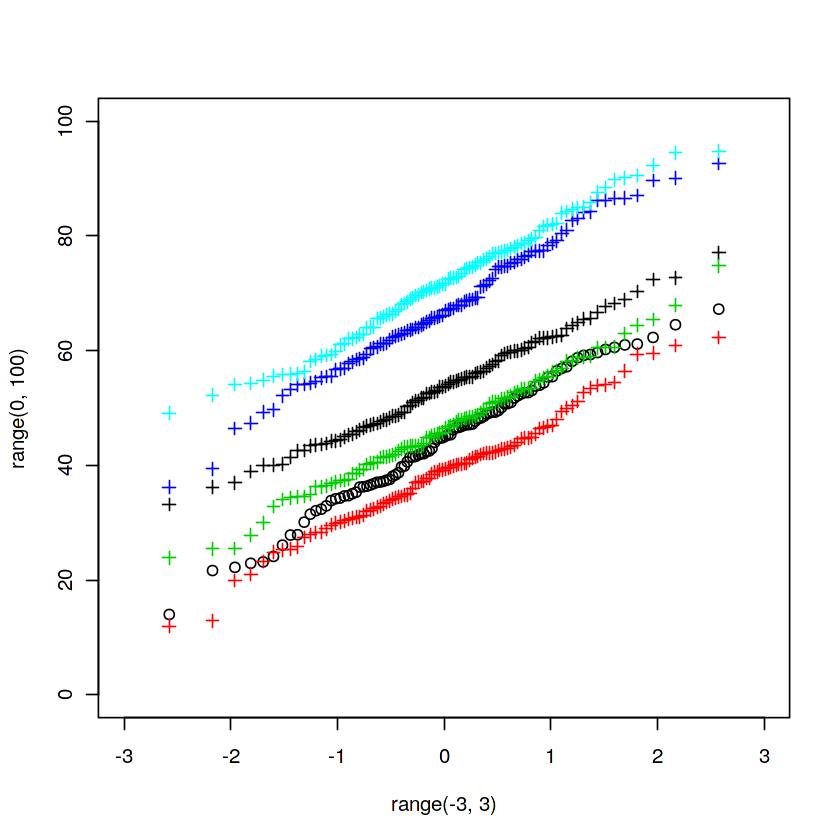

In [6]:
p1 <- qqnorm(dane$Post1, plot.it = FALSE)
p2 <- qqnorm(dane$Post2, plot.it = FALSE)
p3 <- qqnorm(dane$Post3, plot.it = FALSE)
p4 <- qqnorm(dane$Post4, plot.it = FALSE)
p5 <- qqnorm(dane$Post5, plot.it = FALSE)
p6 <- qqnorm(dane$Post6, plot.it = FALSE)
plot(range(-3, 3), range(0, 100), type = "n")
points(p1)
points(p2, col = 1, pch = 3)
points(p3, col = 2, pch = 3)
points(p4, col = 3, pch = 3)
points(p5, col = 4, pch = 3)
points(p6, col = 5, pch = 3)

All of lines above are parallel. It means that variance is the same across all variables.

It seems that all assumptions are met. We can proceed with ANOVA.

Before we start, we need to convert our dataset to "long" format.

In [7]:
dane_long=data.table(height=c(dane$Post1,dane$Post2,dane$Post3,dane$Post4,dane$Post5,dane$Post6),
                     post=c(rep("p1",length(dane$Post1)),rep("p2",length(dane$Post2)),
                            rep("p3",length(dane$Post3)),rep("p4",length(dane$Post4)),
                            rep("p5",length(dane$Post5)),rep("p6",length(dane$Post6))))

ANOVA assumes that

$Y_{1,1}$, $Y_{1,2}$, $\ldots$ , $Y_{1,n_1}$  $\sim$ $N$($\mu_1$,$\sigma$),

$Y_{2,1}$, $Y_{2,2}$, $\ldots$ , $Y_{2,n_2}$ $\sim$ $N$($\mu_2$,$\sigma$),

$\ldots$

$Y_{k,1}$, $Y_{k,2}$, $\ldots$ , $Y_{k,n_k}$ $\sim$ $N$($\mu_k$,$\sigma$),

are independent.

The hypotheses are

$H_0$: $\mu_1=\ldots=\mu_k$

$H_1$: $\exists_{i,j \in \{1,2,\ldots,k\}} \mu_i \neq \mu_j$


We set significance level to 0.05.

In [8]:
SageANOVA=aov(height~post,data=dane_long)
summary(SageANOVA)

             Df Sum Sq Mean Sq F value Pr(>F)    
post          5  88250   17650   173.3 <2e-16 ***
Residuals   594  60506     102                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

According to $p$-value of the $F$-test, we should reject null hypothesis all means being the same.

Now we will try to find the structure of the means. In other word, our goal is to group the same means  of heights together. To do so, we will perform Scheffe's method of post hoc analysis. Again, we consider significance level equal to 0.05.

In [9]:
library(DescTools)
PostHocTest(SageANOVA, which = NULL,
            method = "scheffe",
            conf.level = 0.95, ordered = TRUE)


Attaching package: ‘DescTools’


The following object is masked from ‘package:data.table’:

    %like%





  Posthoc multiple comparisons of means: Scheffe Test 
    95% family-wise confidence level

$post
            diff      lwr.ci      upr.ci    pval    
p2-p1   9.544356   4.7791728  14.3095388 3.3e-08 ***
p3-p1  -5.408596 -10.1737795  -0.6434134 0.01425 *  
p4-p1   2.360033  -2.4051497   7.1252164 0.74082    
p5-p1  23.329793  18.5646104  28.0949764 < 2e-16 ***
p6-p1  27.604518  22.8393352  32.3697013 < 2e-16 ***
p3-p2 -14.952952 -19.7181353 -10.1877693 < 2e-16 ***
p4-p2  -7.184322 -11.9495055  -2.4191395 0.00015 ***
p5-p2  13.785438   9.0202545  18.5506206 < 2e-16 ***
p6-p2  18.060162  13.2949794  22.8253454 < 2e-16 ***
p4-p3   7.768630   3.0034468  12.5338128 2.3e-05 ***
p5-p3  28.738390  23.9732068  33.5035729 < 2e-16 ***
p6-p3  33.013115  28.2479317  37.7782977 < 2e-16 ***
p5-p4  20.969760  16.2045770  25.7349431 < 2e-16 ***
p6-p4  25.244485  20.4793019  30.0096679 < 2e-16 ***
p6-p5   4.274725  -0.4904582   9.0399079 0.11209    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.0

From output above, we can see that we should combine post 1 with post 3 and post 5 with post 6. Let's create another dataset with those posts combined and again perform ANOVA with Scheffe's method. 

In [10]:
dane_long_comb1=data.table(height=c(dane$Post1,dane$Post2,dane$Post3,dane$Post4,dane$Post5,dane$Post6),
                     post=c(rep("p1",length(dane$Post1)),rep("p2",length(dane$Post2)),
                            rep("p3",length(dane$Post3)),rep("p1",length(dane$Post4)),
                            rep("p5",length(dane$Post5)),rep("p5",length(dane$Post6))))
SageANOVA_comb1=aov(height~post,data=dane_long_comb1)
summary(SageANOVA_comb1)

             Df Sum Sq Mean Sq F value Pr(>F)    
post          3  87058   29019   280.3 <2e-16 ***
Residuals   596  61698     104                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

As expected, ANOVA $F$-test still says that at significance level 0.05 there are groups that have different means.

In [11]:
PostHocTest(SageANOVA_comb1, which = NULL,
            method = "scheffe",
            conf.level = 0.95, ordered = TRUE)


  Posthoc multiple comparisons of means: Scheffe Test 
    95% family-wise confidence level

$post
            diff     lwr.ci    upr.ci   pval    
p2-p1   8.364339   4.870866  11.85781  2e-09 ***
p3-p1  -6.588613 -10.082087  -3.09514  5e-06 ***
p5-p1  24.287139  21.434730  27.13955 <2e-16 ***
p3-p2 -14.952952 -18.986868 -10.91904 <2e-16 ***
p5-p2  15.922800  12.429326  19.41627 <2e-16 ***
p5-p3  30.875752  27.382279  34.36923 <2e-16 ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


All of $p-$values from second Sheffe's method are lower than significance level 0.05. We conclude that:
* Post 1 and Post 4 have the same mean of heights of common sage.
* Post 5 and Post 6 have the same mean of heights of common sage.
* Other than that, all posts have different height mean.

It means that herbicide used on Post 1 has the same effect on common sage as herbicide used on Post 4. Herbicide used on Post 5 has the same effect as herbicide used on Post 6. All other herbicides have different effects.

In [12]:
data.table('Post 1'=mean(dane$Post1),'Post 2'=mean(dane$Post2),
           'Post 3'=mean(dane$Post3),'Post 4'=mean(dane$Post4),
           'Post 5'=mean(dane$Post5),'Post 6'=mean(dane$Post6))

Post 1,Post 2,Post 3,Post 4,Post 5,Post 6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44.13168,53.67604,38.72309,46.49172,67.46148,71.7362


Knowing the structure of means we can notice that Post 3 has the shortest weeds among all posts and the difference is statistically significant. Based on this dataset and analysis we can recommend using herbicide that was sprayed on Post 3.